In [1]:
library(tidyverse)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
str(sleep)
head(sleep)

'data.frame':	20 obs. of  3 variables:
 $ extra: num  0.7 -1.6 -0.2 -1.2 -0.1 3.4 3.7 0.8 0 2 ...
 $ group: Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ ID   : Factor w/ 10 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...


extra,group,ID
0.7,1,1
-1.6,1,2
-0.2,1,3
-1.2,1,4
-0.1,1,5
3.4,1,6


In [3]:
# 약제 1을 복용했을 때 수면시간의 증가 (단위는 시간이다)

y <- sleep$extra[sleep$group == 1]
y

[1]  0.7 -1.6 -0.2 -1.2 -0.1  3.4  3.7  0.8  0.0  2.0

In [4]:
summary(y)
sd(y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.600  -0.175   0.350   0.750   1.700   3.700 

[1] 1.78901

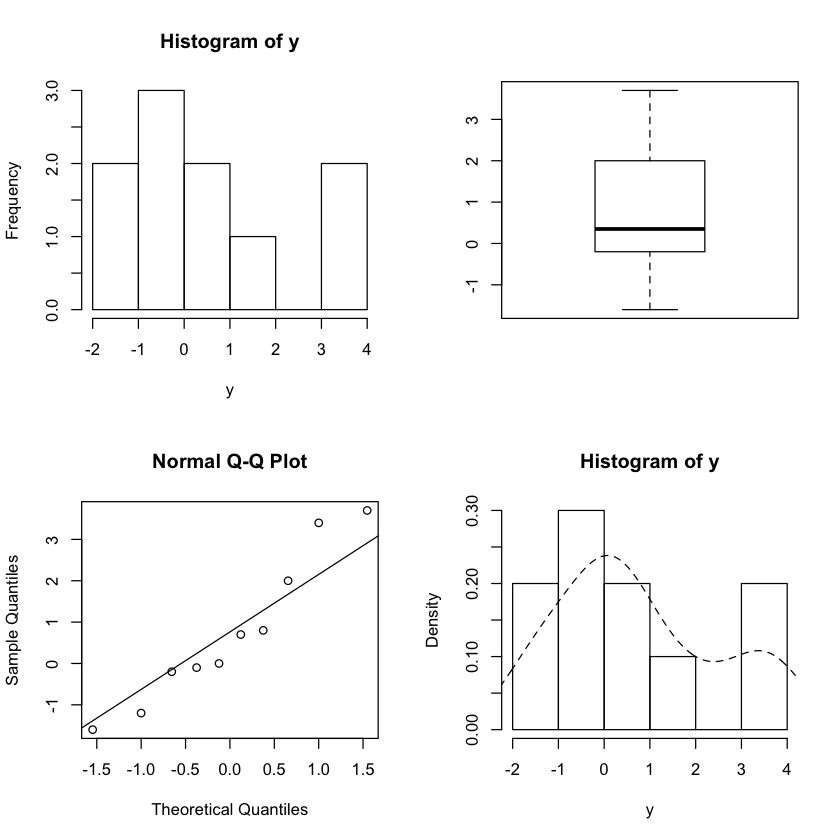

In [5]:
par(mfrow=c(2,2))
hist(y)
boxplot(y)
qqnorm(y); qqline(y)
hist(y, prob=TRUE)
lines(density(y), lty=2)

In [ ]:


par(mfrow=c(2,2))
hist(y)
boxplot(y)
qqnorm(y); qqline(y)
hist(y, prob=TRUE)
lines(density(y), lty=2)


png("../plots/6-1.png", 5.5, 4, units='in', pointsize=9, res=600)
y <- sleep$extra[sleep$group == 1]
opar <- par(mfrow=c(2,2))
hist(y)
boxplot(y)
qqnorm(y); qqline(y)
hist(y, prob=TRUE)
lines(density(y), lty=2)
par(opar)
dev.off()

# '일변량 t-검정(one-sample t-test)'
t.test(y)

t.test(y, alternative="greater")


# 개개인의 수면시간증가값 모형
#  평균이 0이고, 표준편차가 1.8(시간)인 종 모양의 분포(bell shaped distribution)
# N(0, 1.8^2)
curve(dnorm(x, 0, 1.8), -4, 4)

png("../plots/6-2.png", 5.5, 4, units='in', pointsize=9, res=600)
curve(dnorm(x, 0, 1.8), -4, 4)
dev.off()


# 크기가 10개인 새로운 표본
options(digits = 3)
set.seed(1606)
(y_star <- rnorm(10, 0, 1.8))
mean(y_star-0); sd(y_star)
(t_star <- mean(y_star-0) / (sd(y_star)/sqrt(length(y_star))))


(y_star <- rnorm(10, 0, 1.8))
mean(y_star-0); sd(y_star)
(t_star <- mean(y_star-0) / (sd(y_star)/sqrt(length(y_star))))


(y_star <- rnorm(10, 0, 1.8))
mean(y_star-0); sd(y_star)
(t_star <- mean(y_star-0) / (sd(y_star)/sqrt(length(y_star))))


# 10,000개의 평행우주의 표본 (각 표본은 10개의 관측치를 포함한다)
# , 그리고 각 표본의 평균값, 표본표준편차, 그리고 t-통계량 값을  계산할 수 있다:

set.seed(1606)
B <- 1e4
n <- 10
xbars_star <- rep(NA, B)
sds_star <- rep(NA, B)
ts_star <- rep(NA, B)
for(b in 1:B){
  y_star <- rnorm(n, 0, 1.789)
  m <- mean(y_star)
  s <- sd(y_star)
  xbars_star[b] <- m
  sds_star[b] <- s
  ts_star[b] <- m / (s/sqrt(n))
}


opar <- par(mfrow=c(2,2))
hist(xbars_star, nclass=100)
abline(v = 0.75, col='red')
hist(sds_star, nclass=100)
abline(v = 1.789, col='red')
hist(ts_star, nclass=100)
abline(v = 1.3257, col='red')
qqnorm(ts_star); qqline(ts_star)
par(opar)

png("../plots/6-3.png", 5.5*.8, 4, units='in', pointsize=9, res=600)
opar <- par(mfrow=c(2,2))
hist(xbars_star, nclass=100)
abline(v = 0.75, col='red')
hist(sds_star, nclass=100)
abline(v = 1.789, col='red')
hist(ts_star, nclass=100)
abline(v = 1.3257, col='red')
qqnorm(ts_star); qqline(ts_star)
par(opar)
dev.off()


# 우리가 관측한 t-통계량 값 1.3257은 시뮬레이션 분포에서 어디에 있는가?

length(which(ts_star > 1.3257)) / B

# 스튜던트 t 분포
# 다양한 자유도 값에 따른 t 밀도함수
# https://en.wikipedia.org/wiki/Student%27s_t-distribution
# Credit: 권용찬
nlist=c(1,2,5)
x <- seq(-5, 5, 0.05)
y <- matrix(0, nr=length(x), nc=length(nlist))
plot(x, type="n", xlab="x", ylab="P(x)",
     xlim=c(-5,5), ylim=c(0, 0.45))
for( i in 1:length(nlist)){
  y[,i] <- dt(x, df=nlist[i])
  lines(x, y[,i], col=i, lwd=2)
}
lines(x, dnorm(x), col=4, lwd=2)
legend_text <- c(expression(paste(nu,"=1 ")),
                 expression(paste(nu,"=2 ")),
                 expression(paste(nu,"=5 ")),
                 expression(paste(nu,"=",infinity)))
legend("topright", legend=legend_text, lty=1, lwd=2, col=c(1:3,4),
       inset=.05)


png("../plots/6-4.png", 5.5, 4, units='in', pointsize=9, res=600)
nlist=c(1,2,5)
x <- seq(-5, 5, 0.05)
y <- matrix(0, nr=length(x), nc=length(nlist))
plot(x, type="n", xlab="x", ylab="P(x)",
     xlim=c(-5,5), ylim=c(0, 0.45))
for( i in 1:length(nlist)){
  y[,i] <- dt(x, df=nlist[i])
  lines(x, y[,i], col=i, lwd=2)
}
lines(x, dnorm(x), col=4, lwd=2)
legend_text <- c(expression(paste(nu,"=1 ")),
                 expression(paste(nu,"=2 ")),
                 expression(paste(nu,"=5 ")),
                 expression(paste(nu,"=",infinity)))
legend("topright", legend=legend_text, lty=1, lwd=2, col=c(1:3,4), inset=.05)
dev.off()




# 8. 신뢰구간의 의미
set.seed(1606)
(y_star <- rnorm(10, 1, 1.8))
t.test(y_star)$conf.int
(y_star <- rnorm(10, 1, 1.8))
t.test(y_star)$conf.int
(y_star <- rnorm(10, 1, 1.8))
t.test(y_star)$conf.int


library(tidyverse)
set.seed(1606)
B = 1e2
conf_intervals <-
  data.frame(b=rep(NA, B),
             lower=rep(NA, B),
             xbar=rep(NA, B),
             upper=rep(NA, B))
true_mu <- 1.0
for(b in 1:B){
  (y_star <- rnorm(10, true_mu, 1.8))
  conf_intervals[b, ] = c(b=b,
                          lower=t.test(y_star)$conf.int[1],
                          xbar=mean(y_star),
                          upper=t.test(y_star)$conf.int[2])
}
conf_intervals <- conf_intervals %>%
  mutate(lucky = (lower <= true_mu & true_mu <= upper))

glimpse(conf_intervals)
table(conf_intervals$lucky)
conf_intervals %>% ggplot(aes(b, xbar, col=lucky)) +
  geom_point() +
  geom_errorbar(aes(ymin=lower, ymax=upper)) +
  geom_hline(yintercept=true_mu, col='red')
ggsave("../plots/6-6.png", width=5.5, height=4, units='in', dpi=600)



# 6.10.2. 중심극한정리

hist(c(0, 1), nclass=100, prob=TRUE, main='Individual sleep time increase')
set.seed(1606)
B <- 1e4
n <- 10
xbars_star= rep(NA, B)
for(b in 1:B){
  xbars_star[b] <- mean(sample(c(0,1), size=n, replace=TRUE))
}
hist(xbars_star, nclass=100, main='Sample mean of 10 obs')

png("../plots/6-8.png", 5.5, 4*.8, units='in', pointsize=9, res=600)
opar = par(mfrow=c(1,2))
hist(c(0, 1), nclass=100, prob=TRUE, main='Individual sleep time increase')
hist(xbars_star, nclass=100, main='Sample mean of 10 obs')
par(opar)
dev.off()

# 6.11. 모수추정의 정확도는 sqrt(n)에 비례한다.
diff(t.test(y)$conf.int)
mean(y)
diff(t.test(y)$conf.int)/2

# 자료의 incremental 가치
png("../plots/6-9.png", 5.5, 4*.8, units='in', pointsize=9, res=600)
opar = par(mfrow=c(1,2))
curve(1/sqrt(x), 1, 1000, log='x', main='s.e. vs sample size')
curve((1/sqrt(x) - 1/sqrt(x+10)) / (1/sqrt(x)), 1, 1000, log='x',
      main='% decrease in s.e. \nwhen adding 10 obs')
par(opar)
dev.off()
